### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with.

In [1]:
# Import dataset from keras
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist as FM
import tensorflow as tf

# Load the data lables and images
(Images_train, Labels_train), (Images_test, Labels_test) = FM.load_data()

# Print the data shape
print("Images_train shape: ", Images_train.shape)
print("Labels_train shape: ", Labels_train.shape)
print("Images_test shape: ", Labels_test[0])

4422102/4422102 [==============================] - 0s 0us/step
Images_train shape:  (60000, 28, 28)
Labels_train shape:  (60000,)
Images_test shape:  9


In [3]:
print(f'Image Data Type: {type(Images_train)}')
print(f'Image Element Data Type: {type(Images_train[0,0,0])}')
print(f'Label Element Data Type: {type(Labels_train[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {Images_train.shape}')
print(f'Labels: {Labels_train.shape}')

# The text images should be a random sample of the overall test set
print('Test Data:') 
print(f'Images: {Images_test.shape}')
print(f'Labels: {Labels_test.shape}')
print('Image Data Range:')
print(f'Min: {Images_train.min()}')
print(f'Max: {Images_train.max()}')

Image Data Type: <class 'numpy.ndarray'>
Image Element Data Type: <class 'numpy.uint8'>
Label Element Data Type: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


### Train Data

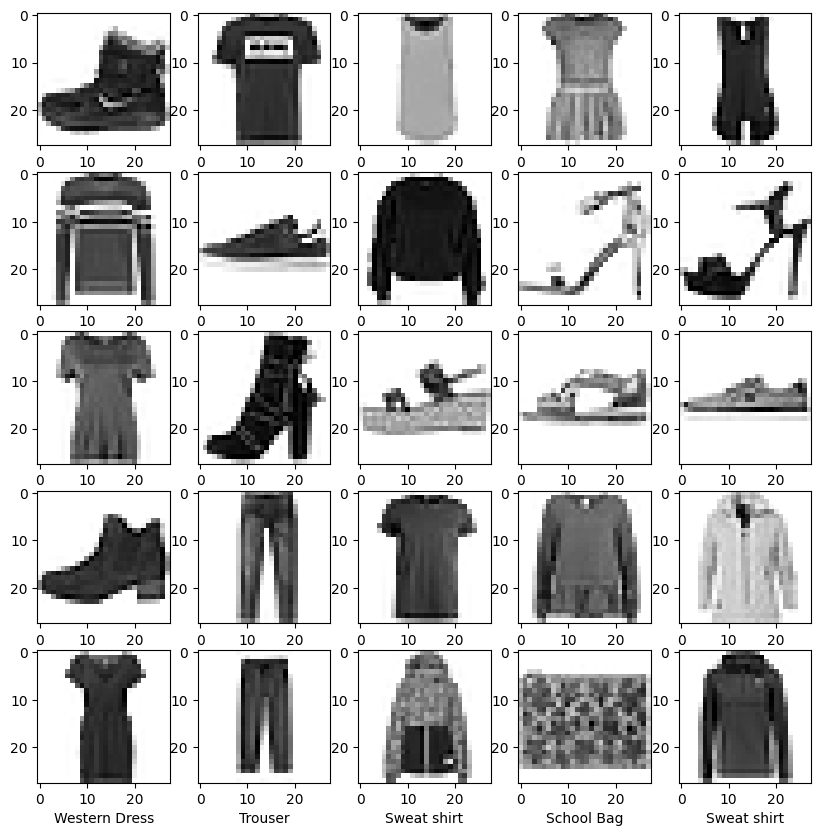

In [33]:
import matplotlib.pyplot as plt
labels={
    0:'Top',
    1:'Trouser',
    2:'hoodie',
    3:'Western Dress',
    4:'Sweat shirt',
    5:'Sandal',
    6:'Men Shirt',
    7:'Fancy Boot',
    8:'School Bag',
    9:'Boot'
}
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
   
    plt.imshow(Images_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[Labels_train[i]])

### Test Data

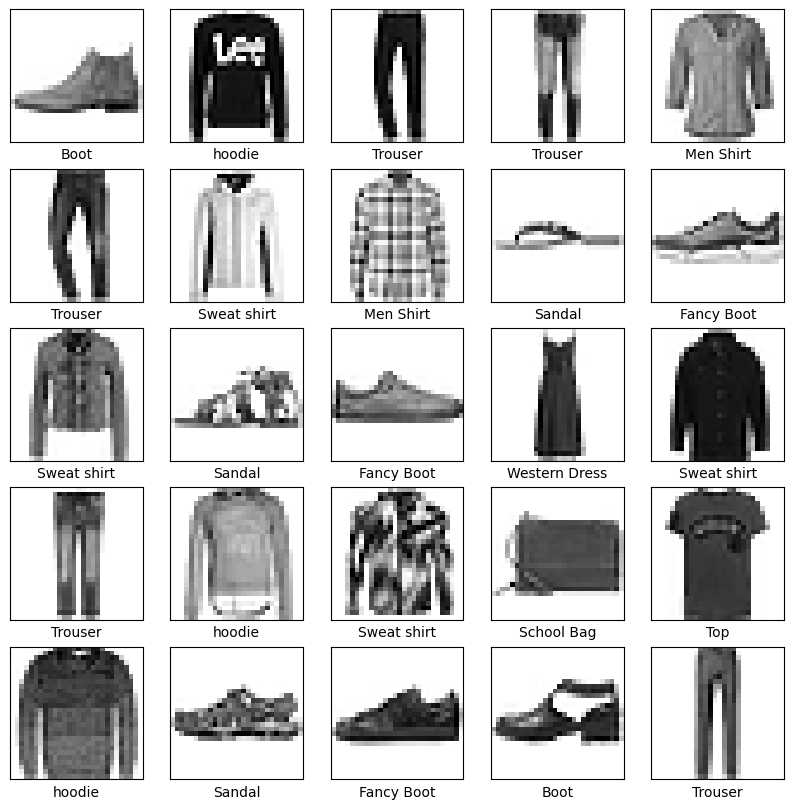

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(Images_test[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[Labels_test[i]])

In [26]:
Labels_train[9]

5

### Checking Length

In [13]:
# Print the training and testing datasets
print("Train datasets: ", len(Images_train))
print("Test datasets: ", len(Images_test))

Train datasets:  60000
Test datasets:  10000


In [14]:
# Flattening the 28x28 image into dim=1(784) vector
Images_train = Images_train.reshape((60000, 28 * 28))  
Images_test = Images_test.reshape((10000, 28 * 28))

# Normalizing the data into range [0,1] by min-max also casting float32
Images_train = Images_train.astype("float32") / 255  
Images_test = Images_test.astype("float32") / 255

### 2. Train a dense neural network using Keras.

In [15]:
# Train a dense neural network
# Import the components
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras import layers

# Building the model
M = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
M.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
M.fit(Images_train, Labels_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
score = M.evaluate(Images_test, Labels_test, verbose=0)
print('Loos Test:', score[0])
print('Accuracy Test:', score[1])

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4753 - accuracy: 0.8313
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3591 - accuracy: 0.8690
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3231 - accuracy: 0.8807
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2997 - accuracy: 0.8897
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2812 - accuracy: 0.8944
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2662 - accuracy: 0.8999
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2518 - accuracy: 0.9063
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2412 - accuracy: 0.9089
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2331 - accuracy: 0.9128
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step -

### 3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration.

In [18]:
# Predict the values from the validation dataset
# Import confusion matrix

import numpy as np
import matplotlib.pyplot as plt
X_pred = M.predict(Images_test[9:10])

# Convert predictions class into hot vectors
X_pred.argmax()

# Convert validation observations into hot vectors
X_true = Labels_test

# confusion matrix
X_pred[0]
X_pred.argmax()

1/1 [==============================] - 0s 24ms/step


7

In [19]:
X_pred[0,7]

0.99999344

In [20]:
Labels_test[9]

7

### Confusion Matrix

In [21]:
X_test_pred = M.predict(Images_test)
X_pred_classes = np.argmax(X_test_pred,axis = 1)

X_pred_classes[0]

C_Matrix =tf.math.confusion_matrix(X_true, X_pred_classes, num_classes=10)
print(C_Matrix)


313/313 [==============================] - 1s 2ms/step
tf.Tensor(
[[882   2  24  10   4   0  75   0   3   0]
 [  2 980   0  10   4   0   4   0   0   0]
 [ 14   0 785   5 116   0  79   0   1   0]
 [ 37   7  33 844  49   0  24   0   6   0]
 [  0   0  69  17 850   0  63   0   1   0]
 [  0   0   0   1   0 933   0  31   1  34]
 [178   0  83  14  64   0 655   0   6   0]
 [  0   0   0   0   0   6   0 941   0  53]
 [  6   0   5   3   7   1   5   4 969   0]
 [  0   0   0   1   0   1   1  18   0 979]], shape=(10, 10), dtype=int32)


### Explaning the confusion Matrix.

The disarray grid contrasts the number of accurate and incorrect predictions provided by the grouping model with the information's actual outcomes (target value). NxN is the size of the framework, where N is the number of target values (classes). The information in the lattice is typically used to evaluate how well these models are being executed. A 2x2 disarray grid for two classes (positive and negative) is shown in the table.

### Print the incorrect data

Incorrect Predictions:  1182


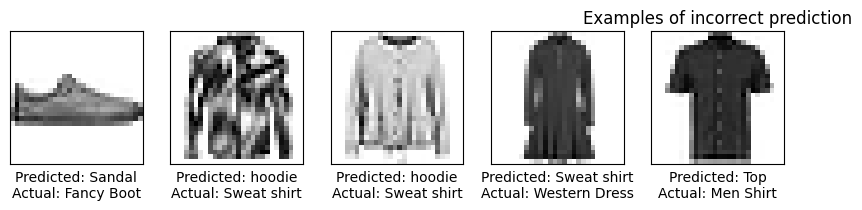

In [35]:
# Printing the first 10 images and their predicted and actual labels
incorrects = np.nonzero( X_pred_classes != Labels_test)[0]
print("Incorrect Predictions: ", len(incorrects))

# Plot the incorrect predictions
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrects[:5]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Images_test[incorrect].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("Predicted: " + labels[X_pred_classes[incorrect]] + "\nActual: " + labels[Labels_test[incorrect]])
plt.title("Examples of incorrect prediction")
plt.show()